# Predicting the Survival of Passengers on the Titanic

## Introduction

In this project, a model will be built to predict the survival of passengers aboard the Titanic, given some data. The data is provided by Kaggle in multiple CSV files. One of the CSV files (train.csv) contain the passenger details and if they survived the Titanic sinking, and the other CSV file (test.csv) contains only the passenger details. 

The model will then be trained off the first CSV file to predict the survival of the passengers listed in the second CSV file.

There are multiple variables inside the data that will first need to be explained:
- survival: 0 for Did not survive, 1 for Survived
- pclass: Ticket class (1, 2 and 3)
- sex: Sex
- Age: Age in years
- subsp: Number of siblings/spouses aboard the Titanic
- parch: Number of parents/children aboard the Titanic
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Several libraries will be used in this analysis, such as numpy, pandas, seaborn, matplotlib, and scikit-learn. They will first need to be imported.

In [952]:
import pandas as pd
import numpy as np 
import seaborn as sns

The CSV files are then imported into DataFrames, then saved into variables for later use.

In [953]:
original_df = pd.read_csv("./train.csv")

In [954]:
df = original_df.copy(deep=True)

## Exploratory Data Analysis

In this section, the data is explored to gain insight. 
.head() is used to display the first few rows of the table to see how the data generally looks like, .describe() is used to check on some basic statistics of the dataset (though some may not have necessarily have much significance until further analysis). The number of rows of missing data is also obtained with .isnull().sum(), and something may have to be done with the missing data before fitting the model.

### General

In [955]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [956]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


df.corr() shows the correlation between the numerical features of the data.

In [957]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [958]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Deriving Missing Fare from Pclass

There appears to be a slight negative correlation between the fare and the Pclass. A boxplot is used to show the distribution of fares in a Pclass. It seems to have some outliers, namely a group of 3 that paid over 500 for their tickets in Pclass 1, and many people who have paid 0 for their tickets, spread out across all Pclasses.

<Axes: xlabel='Pclass', ylabel='Fare'>

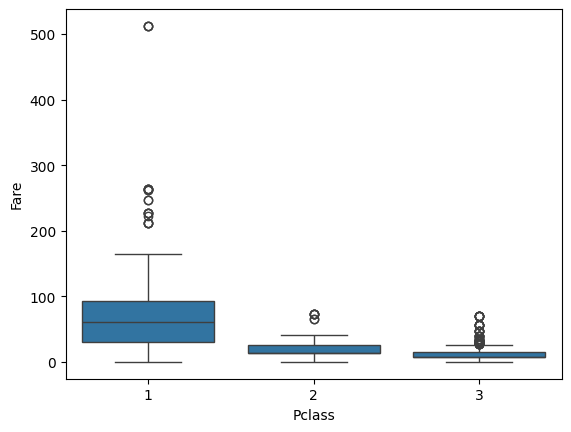

In [959]:
sns.boxplot(data=df, x="Pclass", y='Fare')

In [960]:
df[df['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [961]:
df[df['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


It appears that there are several people with 'LINE' as the value in the ticket column. The filtered DataFrame below shows that all passengers who meet that criteria are male, boarded the ship alone, embarked from Southampton and had a Pclass of '3'. As staff members, it would be expected that they would have fares of 0.

In [962]:
df[df['Ticket']=='LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


The people who did not have Ticket == 'LINE' are as shown below. At this point, a decision can be made to either proceed with the assumption that these people got their tickets for free, or assume there was an error and they actually have paid for their tickets. 

As the 'Pclass' column is the most closely correlated to the fare paid by each passenger, that assumption will be used to train the model in later sections, and can only be done so later, as taking the mean of the entire dataset and substituting the missing values prematurely (before splitting the data into train-test splits) can lead to data leakage and may artificially inflate the model's accuracy. As such, the function alter_fare() is only defined here, and called later.

In [963]:
df[(df['Ticket']!='LINE')& (df['Fare']==0)].sort_values('Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S


In [964]:
def get_average_fare(df,Pclass):
    op = df.groupby('Pclass').median()
    op = pd.DataFrame(op)
    op = op.loc[[Pclass]]
    return op['Fare'].tolist()[0]

def alter_fare(df):
    df.reset_index()
    for i in range(len(df)):
        if (df.loc[i, ('Fare')] == 0.0 or np.isnan(df.loc[i, ('Fare')])) and df.loc[i, ('Ticket')] != 'LINE':
            df.loc[i, ('Fare')] = get_average_fare(df, df.loc[i, ('Pclass')])

In [965]:
alter_fare(df)

### Finding Embarked from Ticket

There are two passengers who have NaN values for their Embarked column. In this section, the 'Ticket' column will be investigated to see if it is possible to derive the embarked values.

In [966]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [967]:
df[df['Ticket'].apply(lambda val: len(val)==6)].sort_values('Ticket').iloc[35:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.00,0,1,113505,55.0000,E33,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,B30,C
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,26.5500,C87,S
61,62,1,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.0000,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,NaN
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.0000,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.00,1,2,113760,120.0000,B96 B98,S


The tickets appear to be split into two categories -- tickets which are purely numerical, or ticket numbers comprising of more than 1 section; a string of number/letters and a number, separated by a space character. A new DataFrame is created from string splitting the 'Ticket' column. The numeric component of the ticket is moved to the 'Ticket2' column with a loop.

In [968]:
tickets = df['Ticket'].str.rsplit(' ', expand=True, n=1)
tickets = tickets.set_axis(['Ticket1', 'Ticket2'], axis=1)

In [969]:
for i in range(len(tickets)):
    if tickets.iloc[i]['Ticket2'] == None and tickets.iloc[i]['Ticket1'] != 'LINE':
        tickets.iloc[i]['Ticket2'] = tickets.iloc[i]['Ticket1']
        tickets.iloc[i]['Ticket1'] = None

In [970]:
tickets.head()

,Ticket1,Ticket2
0,A/5,21171
1,PC,17599
2,STON/O2.,3101282
3,None,113803
4,None,373450


In [971]:
df = pd.concat([df, tickets],axis=1)

In [972]:
def alter_tickets(df):
    tickets = df['Ticket'].str.rsplit(' ', expand=True, n=1)
    tickets = tickets.set_axis(['Ticket1', 'Ticket2'], axis=1)
    for i in range(len(tickets)):
        if tickets.iloc[i]['Ticket2'] == None and tickets.iloc[i]['Ticket1'] != 'LINE':
            tickets.iloc[i]['Ticket2'] = tickets.iloc[i]['Ticket1']
            tickets.iloc[i]['Ticket1'] = None
    op = pd.concat([df, tickets],axis=1)
    op['Ticket1'].fillna('No data')
    op['Ticket2'].fillna(0)
    return op

There are 44 unique values for the alphabetical/first part of the ticket number, and 678 unique values for the numerical part of the ticket number. Instead of analysing Ticket2 as a categorical column, the values in it is converted into integers and analysed as numbers instead.

In [973]:
df[['Ticket1','Ticket2']].nunique()

Ticket1     44
Ticket2    678
dtype: int64

In [974]:
ticket2_to_number = df[df['Ticket2'].notnull()]
ticket2_to_number['Ticket2'] = ticket2_to_number['Ticket2'].astype(int)
ticket2_to_number.head()

C:\Users\K\AppData\Local\Temp\ipykernel_13412\538579446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticket2_to_number['Ticket2'] = ticket2_to_number['Ticket2'].astype(int)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket1,Ticket2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,None,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,None,373450


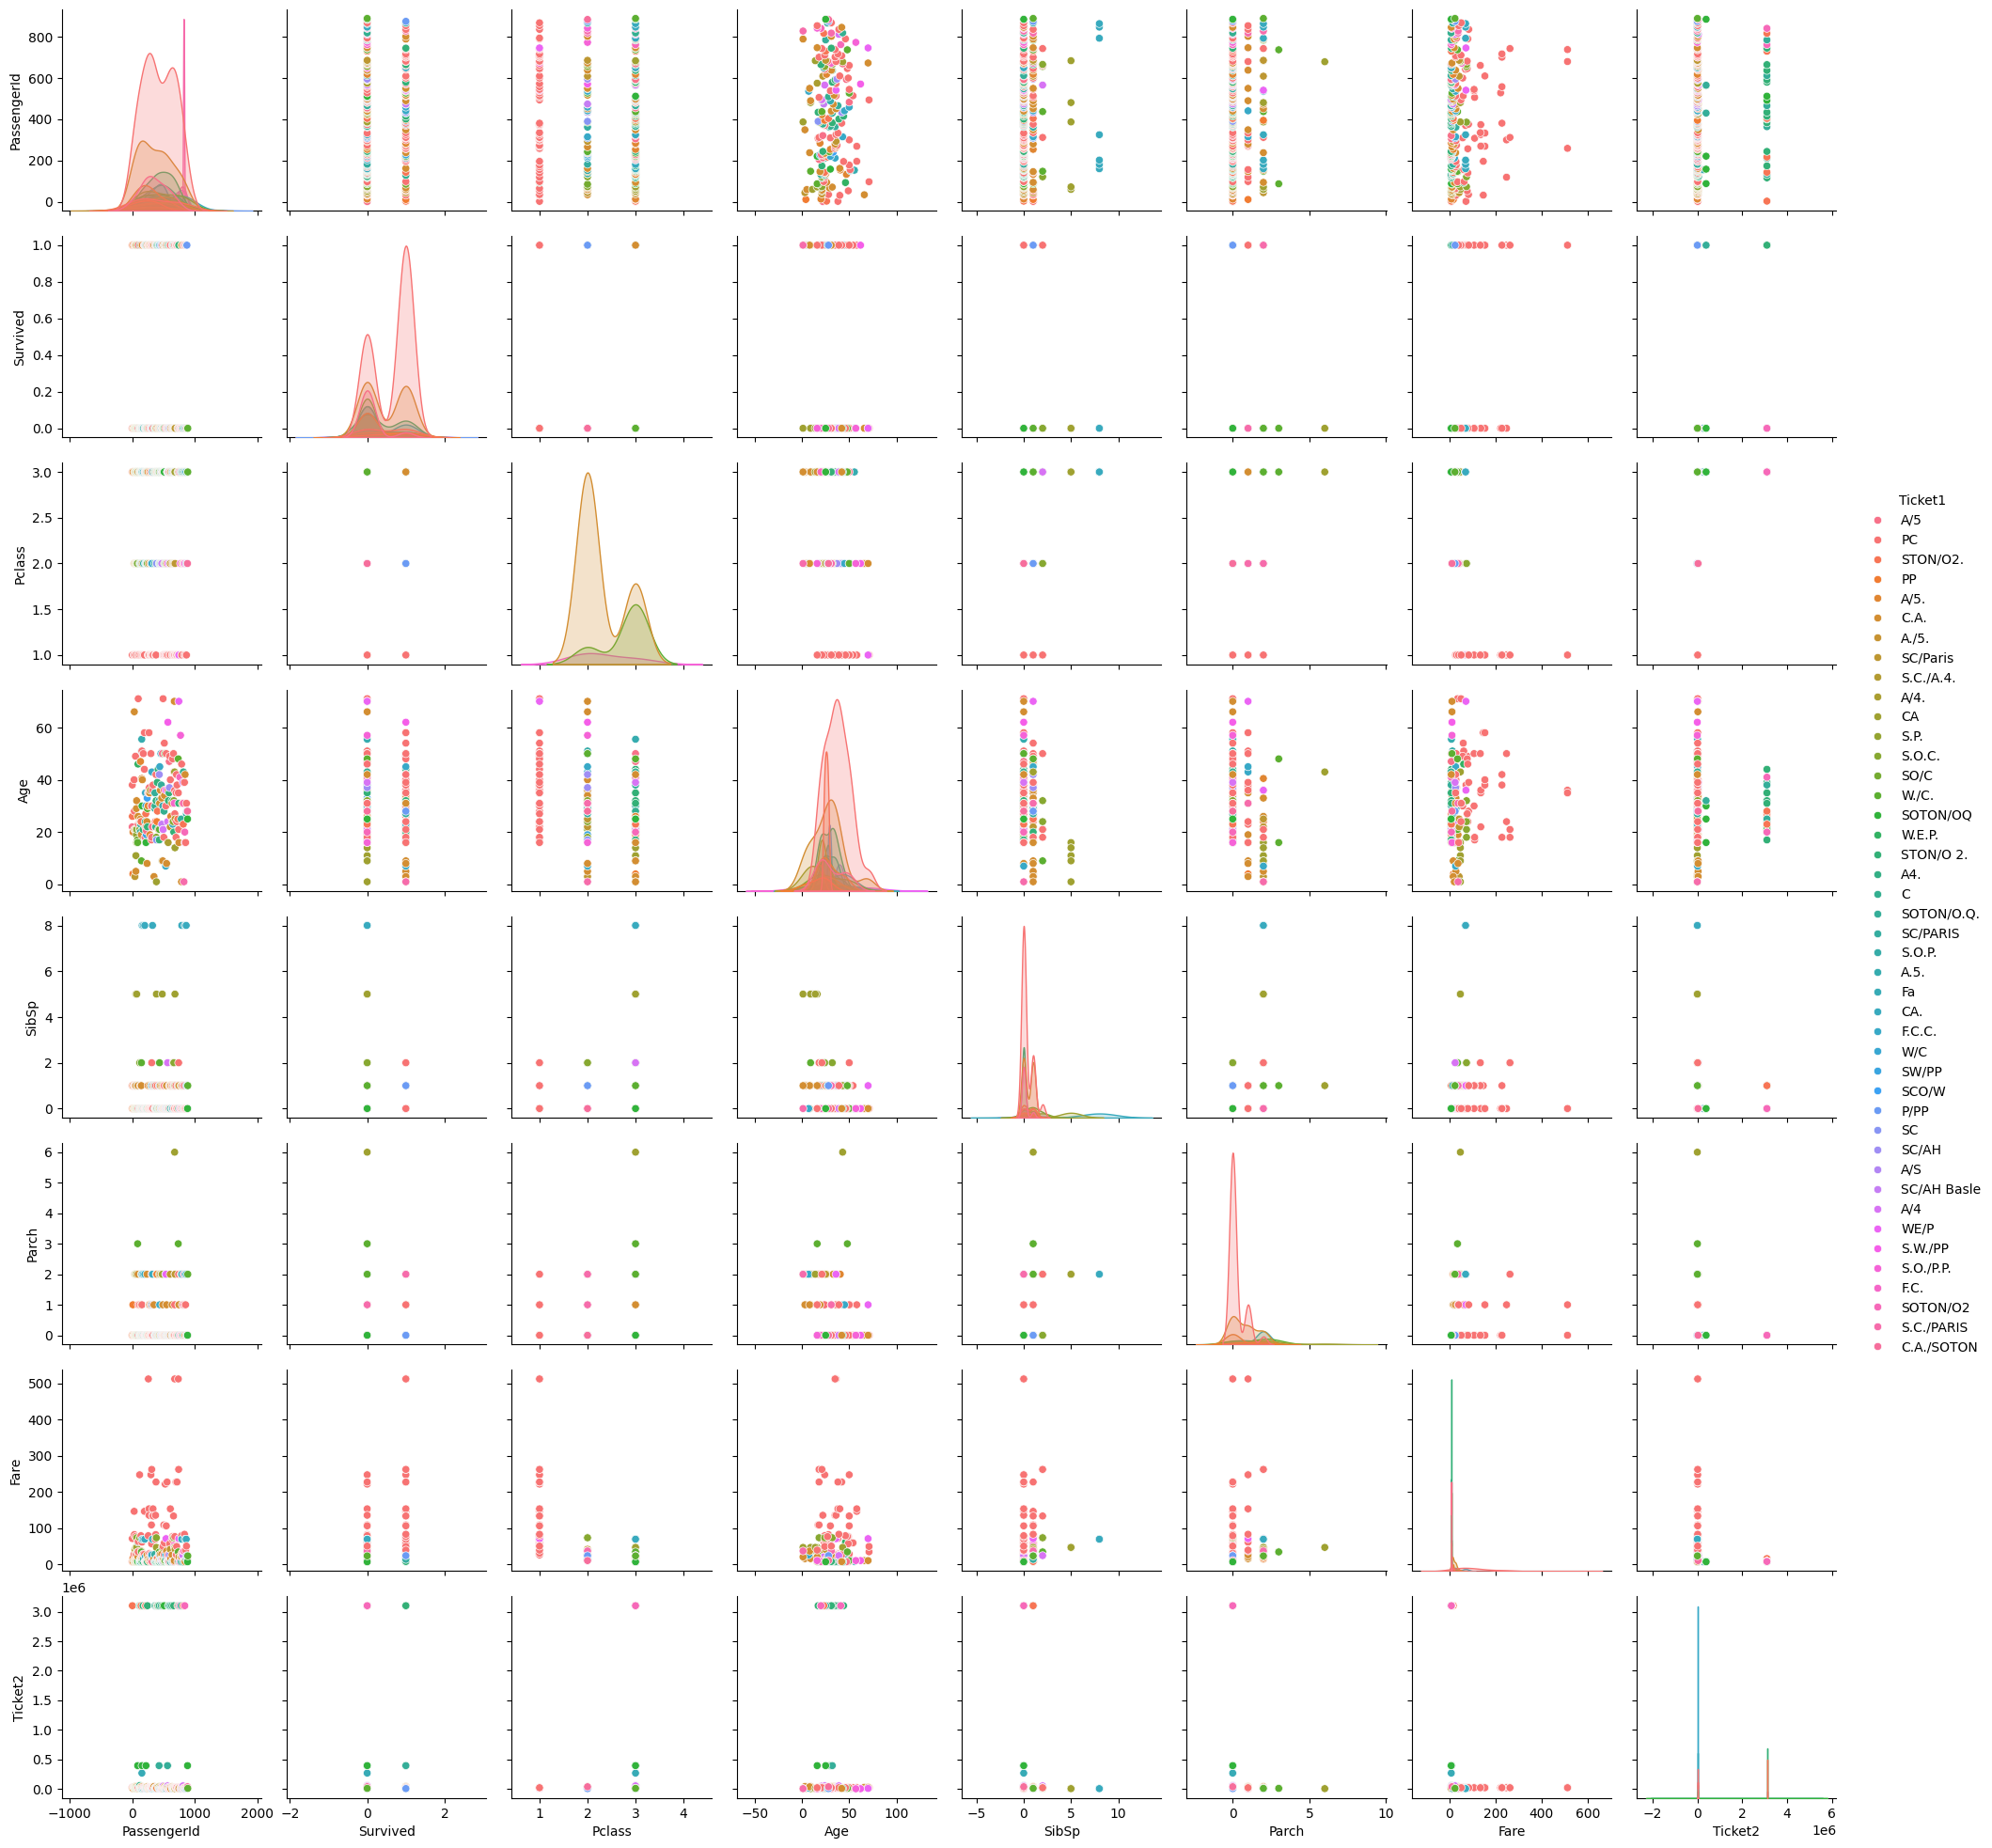

In [975]:
sns.pairplot(ticket2_to_number, hue="Ticket1")

Perhaps it would be better to drop the column for now and revisit this section again after learning more methods.

### Name, Titles, and Correlation with Age

The 'Name' column also appears to have the titles of each passenger, in addition to their first and last names. The 'Name' column seems to be arranged in a format where their last name comes first, followed by a comma, then their titles, followed by a period, and then their first names. This can be extracted through regular expressions/string splitting.

In [976]:
df[['Last Name', 'Other Name']]= df['Name'].str.split(',', expand=True, n=1)
df[['Title', 'First Name']] = df['Other Name'].str.split('.', expand=True, n=1)
df = df.drop('Other Name', axis=1)

In [977]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket1,Ticket2,Last Name,Title,First Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,21171,Braund,Mr,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,17599,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,3101282,Heikkinen,Miss,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,None,113803,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,None,373450,Allen,Mr,William Henry


.nunique() is called to check the new columns for any possible categories. Due to its size, the last name and first name column is unlikely to have much significance. However, the 'title' column has 17 total categories, which could further investigated for possible correlation with other columns.

In [978]:
df[['Last Name','Title','First Name']].nunique()

Last Name     667
Title          17
First Name    799
dtype: int64

In [979]:
df['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Capt              1
 Lady              1
 Don               1
 Sir               1
 the Countess      1
 Ms                1
 Jonkheer          1
 Mme               1
Name: Title, dtype: int64

There are some titles that are only shared by a few people onboard. Those should be removed. Only the top 5 most popular titles are used for the analysis.

In [980]:
title_list = df['Title'].value_counts().head().keys()
title_list

Index([' Mr', ' Miss', ' Mrs', ' Master', ' Dr'], dtype='object')

In [981]:
common_titles = df[df['Title'].isin(title_list)]

In [982]:
common_titles = common_titles.drop(['PassengerId','Name','Ticket','First Name','Last Name'], axis=1)
common_titles.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket1,Ticket2,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,A/5,21171,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,PC,17599,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,STON/O2.,3101282,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,None,113803,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,None,373450,Mr


A pairplot is created to quickly check for any possible patterns. From the plot below, we can see that the title may differ based on the age.

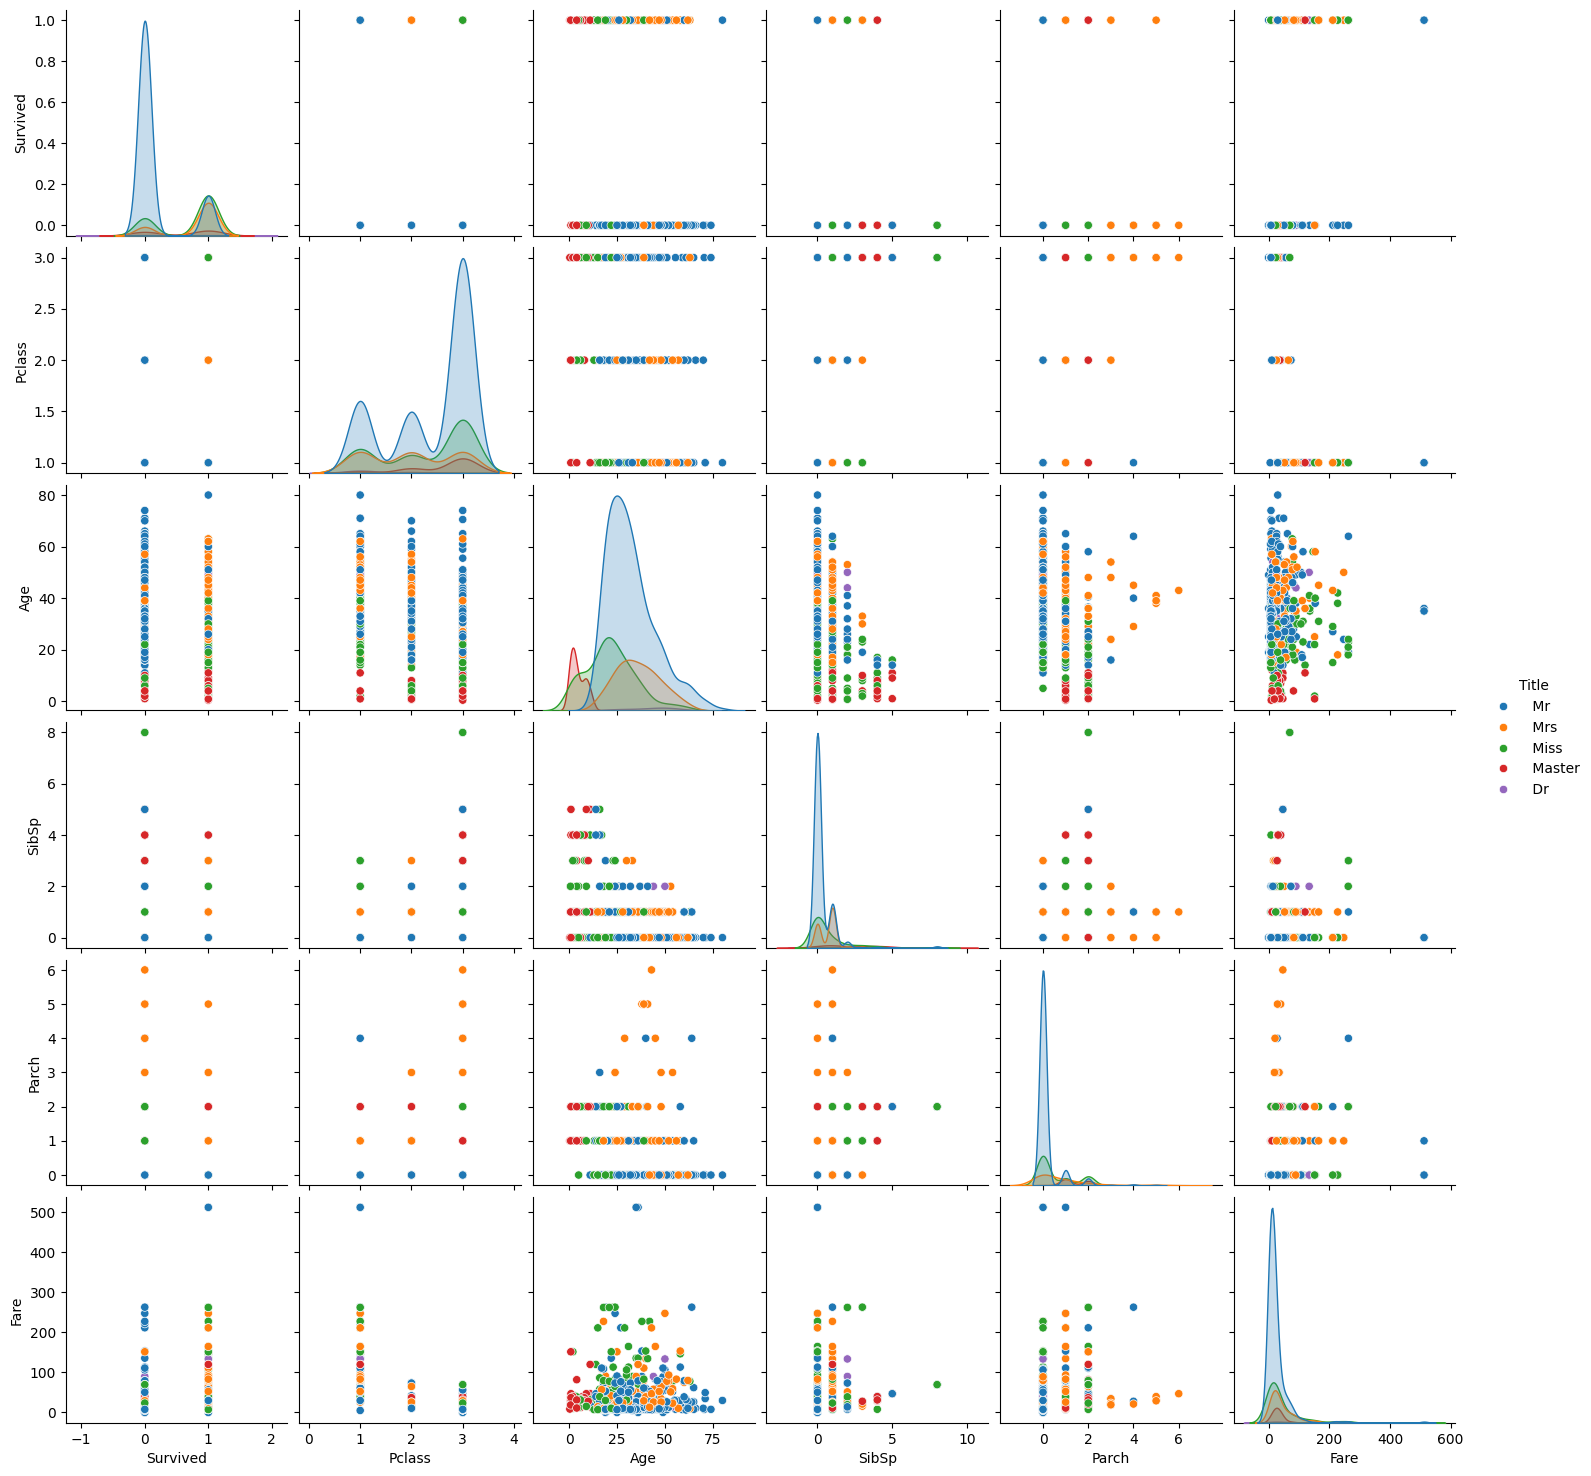

In [983]:
sns.pairplot(common_titles, hue='Title')

<Axes: xlabel='Title', ylabel='Age'>

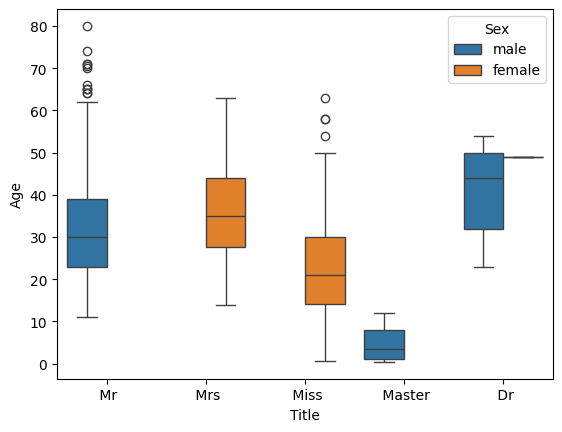

In [984]:
sns.boxplot(common_titles, x='Title', y='Age', hue='Sex')

From the above plot, we can observe that 'Mr' is used for males from the ages of around 10 and above, 'Master' is used for young boys, 'Miss' is used for younger women with some outliers who are older than that, and 'Mrs' is used for older women. 'Dr' is mostly used for older adults, but older adults are not necessarily going to have a title of 'Dr'.

From common knowledge, we know that 'Miss' is used for single women, while 'Mrs' is used for married women. To confirm this, the data is filtered to show that most passengers with the title of 'Mrs' have a name in brackets under 'First Name'. 'Ms' is also commonly used for unmarried older women.

In [985]:
df[df['Title']==' Mrs'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket1,Ticket2,Last Name,Title,First Name
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,17599,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,None,113803,Futrelle,Mrs,Jacques Heath (Lily May Peel)
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,None,347742,Johnson,Mrs,Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,None,237736,Nasser,Mrs,Nicholas (Adele Achem)
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,None,248706,Hewlett,Mrs,(Mary D Kingcome)


In [986]:
df[df['Title']==' Miss'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket1,Ticket2,Last Name,Title,First Name
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,3101282,Heikkinen,Miss,Laina
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,PP,9549,Sandstrom,Miss,Marguerite Rut
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,None,113783,Bonnell,Miss,Elizabeth
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,None,350406,Vestrom,Miss,Hulda Amanda Adolfina
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,None,330923,McGowan,Miss,"Anna ""Annie"""


It may be possible to fill in the missing age data from their titles, but this will only be done after splitting the data to ensure that there is no data leakage.

In [987]:
def alter_names(df):
    df[['Last Name', 'Other Name']]= df['Name'].str.split(',', expand=True, n=1)
    df[['Title', 'First Name']] = df['Other Name'].str.split('.', expand=True, n=1)
    df = df.drop('Other Name', axis=1)
    return df

def get_average_age(df,title):
    op = df.groupby('Title').mean()
    op = pd.DataFrame(op)
    op = op.loc[[title]]
    return op['Age'].tolist()[0]

def alter_ages(df):
    df.reset_index()
    for i in range(len(df)):
        if df.loc[i, ('Title')]== ' Ms':
            df.loc[i, ('Age')] = get_average_age(df, ' Mrs')
        if np.isnan(df.loc[i, ('Age')]):
            df.loc[i, ('Age')] = get_average_age(df, df.loc[i, ('Title')])



### Missing Data in Cabin Column

A group of people with the same ticket number seem to be likely to share the same cabin, or have cabins that are close together.

In [988]:
df[df['Ticket'].duplicated()].sort_values('Ticket').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket1,Ticket2,Last Name,Title,First Name
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S,None,110152,Maioni,Miss,Roberta
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S,None,110152,Rothes,the Countess,of (Lucy Noel Martha Dyer-Edwards)
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S,None,110413,Taussig,Mrs,Emil (Tillie Mandelbaum)
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S,None,110413,Taussig,Miss,Ruth
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.00,A14,S,None,110465,Clifford,Mr,George Quincy


In [989]:
df[df['Cabin'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket1,Ticket2,Last Name,Title,First Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,21171,Braund,Mr,Owen Harris
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,3101282,Heikkinen,Miss,Laina
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,None,373450,Allen,Mr,William Henry
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,None,330877,Moran,Mr,James
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,None,349909,Palsson,Master,Gosta Leonard


For simplicity's sake, duplicate ticket numbers will be dropped and the first value in the 'Cabin' column for each unique ticket number will be included in the cabin_for_ticket DataFrame. 

In [990]:
cabin_for_ticket = df[df['Cabin'].notnull()][['Ticket','Cabin']].drop_duplicates('Ticket').sort_values('Ticket')
cabin_for_ticket.head()

,Ticket,Cabin
257,110152,B77
262,110413,E67
110,110465,C110
430,110564,C52
366,110813,D37


The cabin_for_ticket DataFrame is then used to join on common tickets in other to get the cabins derived from the ticket number.

In [991]:
new_df = pd.merge(df, cabin_for_ticket, how='outer', on='Ticket')
new_df = new_df[(new_df['Cabin_x'].isnull())&(new_df['Cabin_y'].notnull())]
engineered_cabins = new_df['Cabin_y']

In [992]:
engineered_cabins

202          F E69
357    B51 B53 B55
375            C99
401            C46
413        C22 C26
420            C70
442             C7
492        C62 C64
493        C62 C64
637            C86
814            E77
Name: Cabin_y, dtype: object

In [993]:
df['Cabin'] = df['Cabin'].fillna(engineered_cabins)

In [994]:
df['Cabin'].isnull().sum()

677

Despite the replacements, a majority of rows still have missing values for the 'Cabin' column. It may be a better idea to drop the column entirely.

## Data Preparation

The name and tickets column is split across the entire dataset first, using the functions defined in the earlier sections. The original dataset is used to do this. 

In [995]:
train_df = alter_names(original_df)
alter_fare(train_df)
#train_df = alter_tickets(train_df)
train_df.dropna(subset=['Embarked'], inplace=True)

The DataFrame is split between two sections - The X (feature) and Y (Label) sections. The model generated later on will be trained on the X training data, and tested on the Y results. train_test_split is used to automatically split into a 90-10 train-test split.

In [996]:
X = train_df.drop('Survived', axis=1)
Y = train_df['Survived']

In [997]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_train = X_train.reset_index()
X_test = X_test.reset_index()

Certain categories such as Sex, and Embarked place had multiple categories. One-hot encoding is done to assign a numerical value to those variables, and to remove the implication of any order/numerical relationship that the column may have had initially.

In [998]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [999]:
def alter_encode(df):
    arr = encoder.fit_transform(df[['Sex', 'Embarked']]).toarray()
    index = encoder.get_feature_names_out().tolist()
    encoded_columns = pd.DataFrame(arr, columns=index)
    final_df = pd.concat([df, encoded_columns], axis=1)
    final_df = final_df.drop(['Sex', 'Embarked', 'First Name','Last Name', 'Title', 'Name', 'Ticket','Cabin'], axis=1)
    final_df.columns = final_df.columns.astype(str)
    return final_df

In [1000]:
alter_ages(X_train)
alter_fare(X_train)
alter_ages(X_test)
alter_fare(X_test)

The missing age data is then filled in with the earlier defined function alter_ages. The encoded columns are then concatenated with df across their columns (based on their index) to combine the data. The categorical columns are also dropped in alter_encode.

In [1001]:
X_train = alter_encode(X_train)
X_test = alter_encode(X_test)

In [1002]:
X_train.drop('index', inplace=True, axis=1)
X_test.drop('index', inplace=True, axis=1)

A scaler is used to scale everything to normal distribution. The scaler is fitted to only the training data to prevent data leakage, and transformed on all X features.

In [1003]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Fitting the Model

In [1004]:
from sklearn.linear_model import LogisticRegressionCV

In [1005]:
log_model = LogisticRegressionCV(max_iter=10000)
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV(max_iter=10000)

In [1006]:
y_pred = log_model.predict(scaled_X_test)

## Performance Evaluation

In this section, the performance of the test dataset (from the train_test_split) will be determined 

In [1007]:
from sklearn.metrics import ConfusionMatrixDisplay, f1_score

In [1008]:
f1_score(y_test, y_pred)

0.7500000000000001

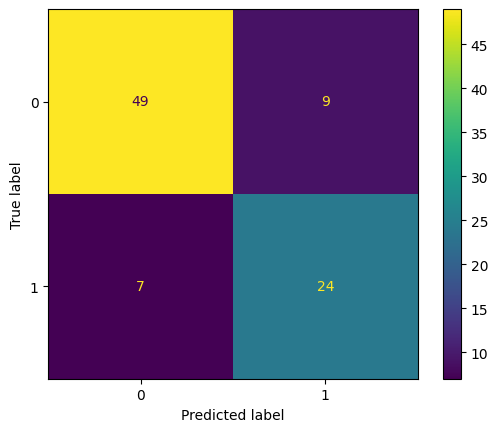

In [1009]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Final Submission

As this dataset is from Kaggle and the objective is to have a model predict the accuracy of the survival of the passengers in 'test.csv', the model is then used to predict the outcomes and the results are exported to a CSV file for submission in their specified format.

In [1010]:
original_df_test = pd.read_csv("./test.csv")

In [1011]:
submission = original_df_test.copy(deep=True)
submission = alter_names(submission)
alter_ages(submission)
alter_fare(submission)
submission = alter_encode(submission)
scaled_submission = scaler.transform(submission)

In [1012]:
sub_pred = log_model.predict(scaled_submission)

In [1013]:
ser = pd.Series(sub_pred)

In [1014]:
sub = pd.DataFrame(ser, columns=['Survived'])

In [1015]:
sub['PassengerId'] = original_df_test['PassengerId']

In [1016]:
sub = sub.set_index('PassengerId')

In [1017]:
sub.to_csv(r'./submission.csv')

The final score after submission to their website was 0.77033, which means that 77.033% of the predictions were correct.